In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
print('Step 1: Loading the dataset...')
data = pd.read_csv('credit_card_approval_large.csv')
display(data.head())

Step 1: Loading the dataset...


,Age,Income,Credit_Score,Approved
0,56,38141,728,1
1,46,100356,610,0
2,32,125878,784,1
3,60,91910,777,0
4,25,76044,750,1



Step 2: Exploratory Data Analysis...


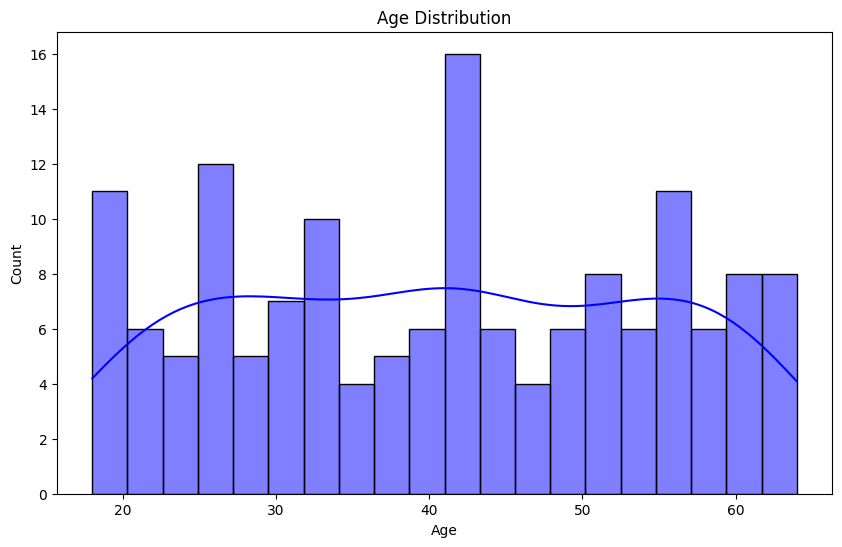

In [3]:
print('\nStep 2: Exploratory Data Analysis...')
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='blue', label='Age')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


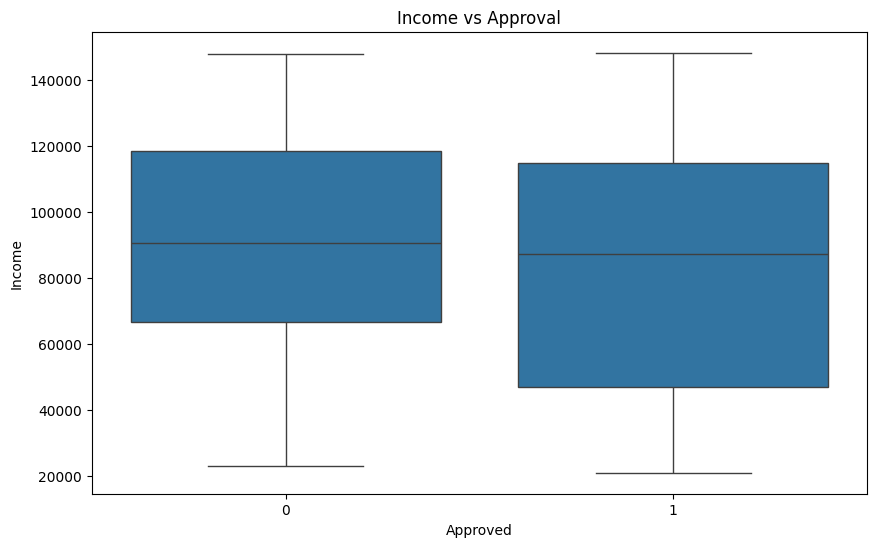

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Approved', y='Income', data=data)
plt.title('Income vs Approval')
plt.show()

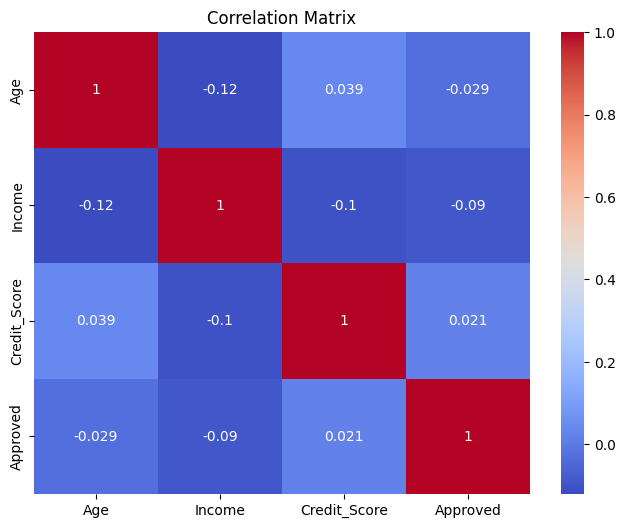

In [5]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Step 3: Prepare features and target
print('\nStep 3: Preparing features and target...')
X = data[['Age', 'Income', 'Credit_Score']]
y = data['Approved']


Step 3: Preparing features and target...


In [7]:
# Step 4: Train-test split
print('\nStep 4: Splitting the data...')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 4: Splitting the data...


In [8]:
# Step 5: Standardize the data
print('\nStep 5: Standardizing features...')
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Step 5: Standardizing features...


In [9]:
# Step 6: Train the model
print('\nStep 6: Training the Logistic Regression model...')
model = LogisticRegression()
model.fit(X_train, y_train)


Step 6: Training the Logistic Regression model...


LogisticRegression()

In [10]:
# Step 7: Make predictions
print('\nStep 7: Making predictions...')
y_pred = model.predict(X_test)



Step 7: Making predictions...


In [11]:
# Step 8: Evaluate the model
print('\nStep 8: Evaluating the model...')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))


Step 8: Evaluating the model...
Accuracy: 43.33%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.43      1.00      0.60        13

    accuracy                           0.43        30
   macro avg       0.22      0.50      0.30        30
weighted avg       0.19      0.43      0.26        30



C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

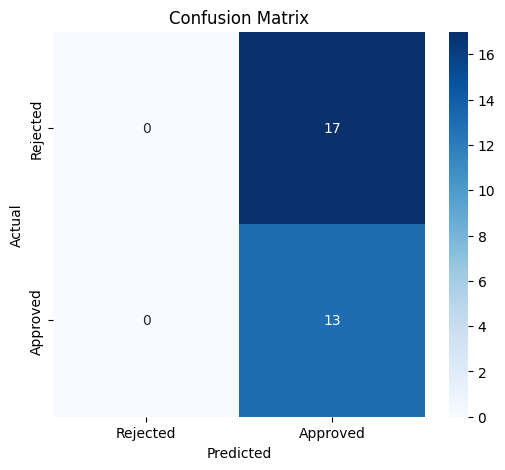

In [12]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()